# Courses

In [103]:
## General Imports
## =================================================================================================== ##

from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# concatenate lists
from itertools import chain

import re

# plotting
import seaborn as sns
sns.set_style('darkgrid')

import warnings

# warning ignore
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'

In [18]:
## Database Conecction 
## =================================================================================================== ##

def get_courses():

    host = 'cluster-tt-0-dp2to.gcp.mongodb.net/formacion?retryWrites=true&ssl=true&ssl_cert_reqs=CERT_NONE'
    user = 'formacion'
    password = '0sHBbtH50yWcT4wO'
    uri = f'mongodb+srv://{user}:{password}@{host}'
    client = MongoClient(uri)

    db = client['formacion']
    collection_courses = db.cursos.find()
    courses = list(collection_courses)
    return courses

In [21]:
# courses data
courses_df = pd.DataFrame(get_courses())
courses_df.head(5)

,_id,title,url,duration,shortDescription,description
0,6193f1fbee942f04c47e8ed8,Descripción de los componentes principales de ...,https://docs.microsoft.com/es-es/learn/modules...,27 min.,Descripción de los componentes principales de ...,"{'tags': ['Principiante', 'Administrador', 'De..."
1,6193f1fbee942f04c47e8edb,Introducción a los aspectos básicos de Azure,https://docs.microsoft.com/es-es/learn/modules...,43 min.,Introducción a los aspectos básicos de Azure,"{'tags': ['Principiante', 'Administrador', 'De..."
2,6193f1fbee942f04c47e8edf,Exploración de los servicios de Azure Compute,https://docs.microsoft.com/es-es/learn/modules...,52 min.,Exploración de los servicios de Azure Compute,"{'tags': ['Principiante', 'Administrador', 'De..."
3,6193f1fbee942f04c47e8ee0,Exploración de los servicios de análisis y bas...,https://docs.microsoft.com/es-es/learn/modules...,43 min.,Exploración de los servicios de análisis y bas...,"{'tags': ['Principiante', 'Administrador', 'De..."
4,6193f1fbee942f04c47e8ee1,Exploración de los servicios de red de Azure,https://docs.microsoft.com/es-es/learn/modules...,38 min.,Exploración de los servicios de red de Azure,"{'tags': ['Principiante', 'Administrador', 'De..."


In [25]:
print(f'The dataset is compounded of: {courses_df.shape[0]} courses')

The dataset is compounded of: 3252 courses


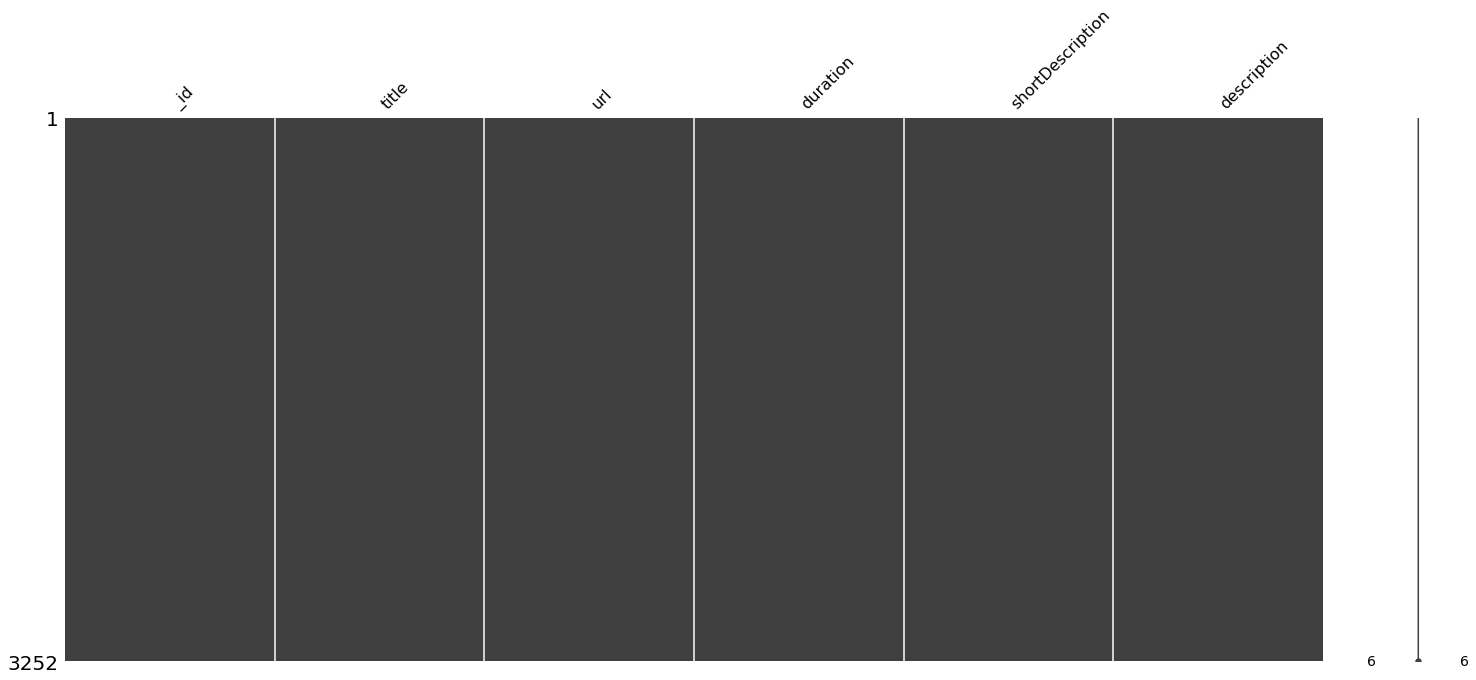

In [20]:
msno.matrix(courses_df);

In [49]:
titles = courses_df['title'].value_counts().shape[0]
print(f'Number of unique name of courses: {titles}')

Number of unique name of courses: 3236


In [40]:
tags = courses_df['description'].apply(lambda description: description['tags']).tolist()
tags = list(chain(*tags))
tags = list(set(tags))
print(f'Number of unique tags: {len(tags)}')

Number of unique tags: 306


In [41]:
tags[0:50]

['Windows',
 'Visual Studio',
 'Human Resources',
 'SQL\xa0Server en Virtual Machines',
 'SignalR Service',
 'HPC Cache',
 'Quantum',
 'SQL Database',
 'Data Box Family',
 'Functional Consultant',
 'Support Engineer',
 'Storage',
 'Azure Advisor',
 'Firewall Manager',
 'Cognitive Search',
 'Outlook',
 'Application Gateway',
 'Lector inmersivo',
 'Azure Portal',
 'Microsoft\xa0Cloud para el sector sanitario',
 'Microsoft Cloud for Healthcare',
 'DevTest Labs',
 'Remote Rendering',
 'Load Balancer',
 'Finance',
 'Active\xa0Directory External Identities ',
 'Return to the Workplace',
 'Profesor de enseñanza superior',
 'SQL Edge',
 'DevOps Engineer',
 'Sales',
 'Machine Learning',
 'DDos Protection',
 'Microsoft\xa0Power\xa0Platform',
 'Microsoft Cloud for Financial Services',
 'Cloud Services',
 'Servicio de cadena de bloques',
 'Blob Storage',
 'Office 365',
 'ASP.NET Core',
 'Database Administrator',
 'Analista de riesgos',
 '.NET',
 'Intermedio',
 'App Service',
 '.NET Core',
 'Web Ap

In [116]:
def numeric_char(text):
    return int(re.sub('[^0-9]','', text))

duration = courses_df['duration'].apply(numeric_char).to_frame()
duration.shape

(3252, 1)

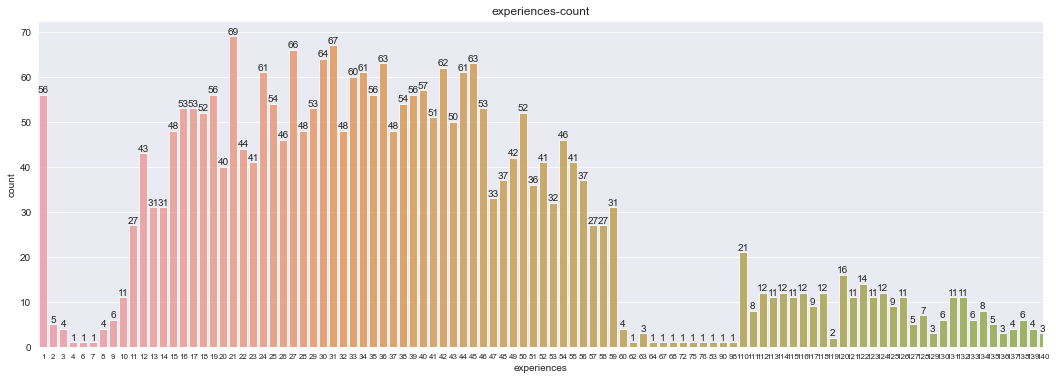

In [110]:
## Plot
## =================================================================================================== ##

time = duration['duration'].value_counts().index
count = duration['duration'].value_counts().values

plt.figure(figsize=(18, 6))
ax=sns.barplot(
    x=time,
    y=count,
    alpha=0.8
)
plt.xticks(fontsize=8)
ax.bar_label(ax.containers[0])
plt.title('experiences-count')
plt.xlabel('experiences')
plt.ylabel('count');
plt.xlim(-0.5, 100);

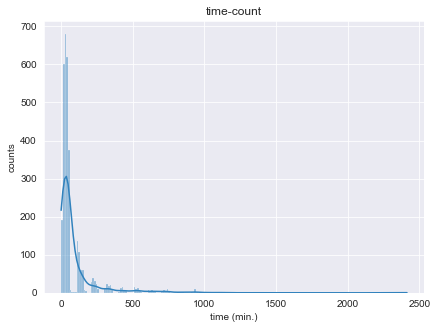

In [113]:
n_bins = 200

plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.histplot(data=duration['duration'], bins=n_bins, color="#3182bd", kde=True)
plt.title('time-count')
plt.xlabel('time (min.)')
plt.ylabel('counts');

In [115]:
#percentiles 25/50/75 & median
per_25 = np.percentile(duration['duration'].dropna(), 25)
per_50 = np.percentile(duration['duration'].dropna(), 50)
per_75 = np.percentile(duration['duration'].dropna(), 75)
per_85 = np.percentile(duration['duration'].dropna(), 85)
median = duration['duration'].median()

print(f'Percentile 25%: {per_25:.0f} times.') 
print(f'Percentile 50%: {per_50:.0f} times.') 
print(f'Percentile 75%: {per_75:.0f} times.')
print(f'Percentile 85%: {per_85:.0f} times.')
print(f'The median is: {median:.0f} times.')

Percentile 25%: 26 times.
Percentile 50%: 40 times.
Percentile 75%: 59 times.
Percentile 85%: 142 times.
The median is: 40 times.
